___
# Linear Regression 

Amazon_cloths sells cloths online. Customers come in to the store, have meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. 
Following is predict is analysis for this company

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

## Imports


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [14]:
df = pd.read_csv('data.csv')

In [15]:
df.head()

,age,cp,thalach,oldpeak,ca,thal,target
0,63,3,150,2.3,0,1,1
1,37,2,187,3.5,0,2,1
2,41,1,172,1.4,0,2,1
3,56,1,178,0.8,0,2,1
4,57,0,163,0.6,0,2,1


In [16]:
df.describe()

,age,cp,thalach,oldpeak,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,149.646865,1.039604,0.729373,2.313531,0.544554
std,9.082101,1.032052,22.905161,1.161075,1.022606,0.612277,0.498835
min,29.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,133.500000,0.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,153.000000,0.800000,0.000000,2.000000,1.000000
75%,61.000000,2.000000,166.000000,1.600000,1.000000,3.000000,1.000000
max,77.000000,3.000000,202.000000,6.200000,4.000000,3.000000,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   cp       303 non-null    int64  
 2   thalach  303 non-null    int64  
 3   oldpeak  303 non-null    float64
 4   ca       303 non-null    int64  
 5   thal     303 non-null    int64  
 6   target   303 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 16.7 KB


## Data Analysis

In [13]:
import seaborn as sns

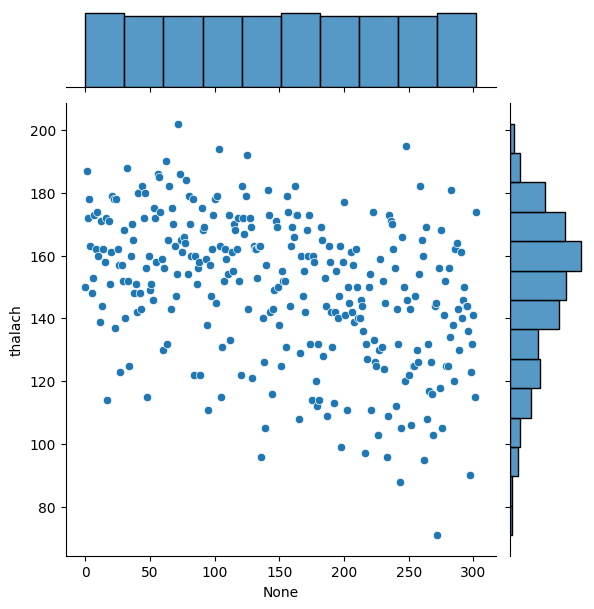

In [26]:
sns.jointplot(df['thalach'])

** Do the same but with the Time on App column instead. **

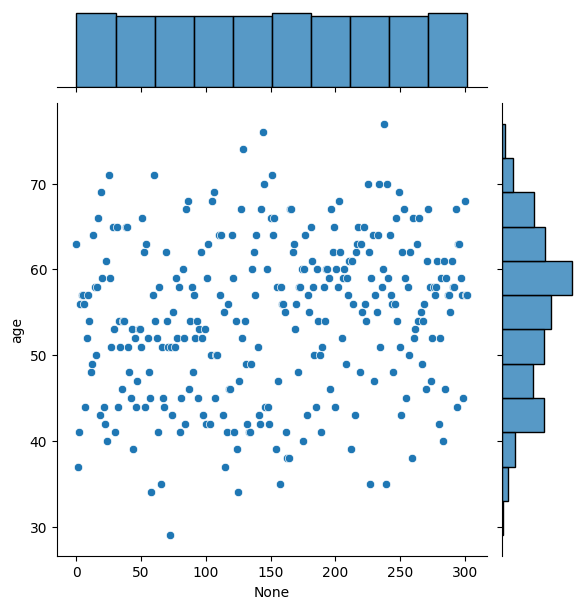

In [29]:
sns.jointplot(df['age'])

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

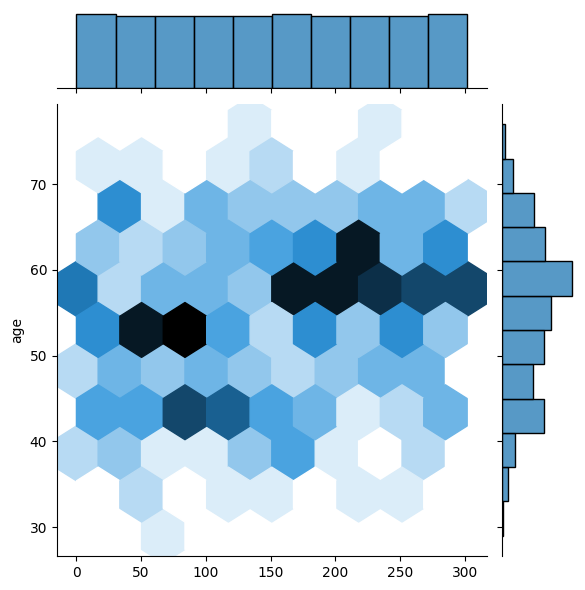

In [31]:
sns.jointplot(df['age'],kind='hex')

**Let's explore these types of relationships across the entire data set **

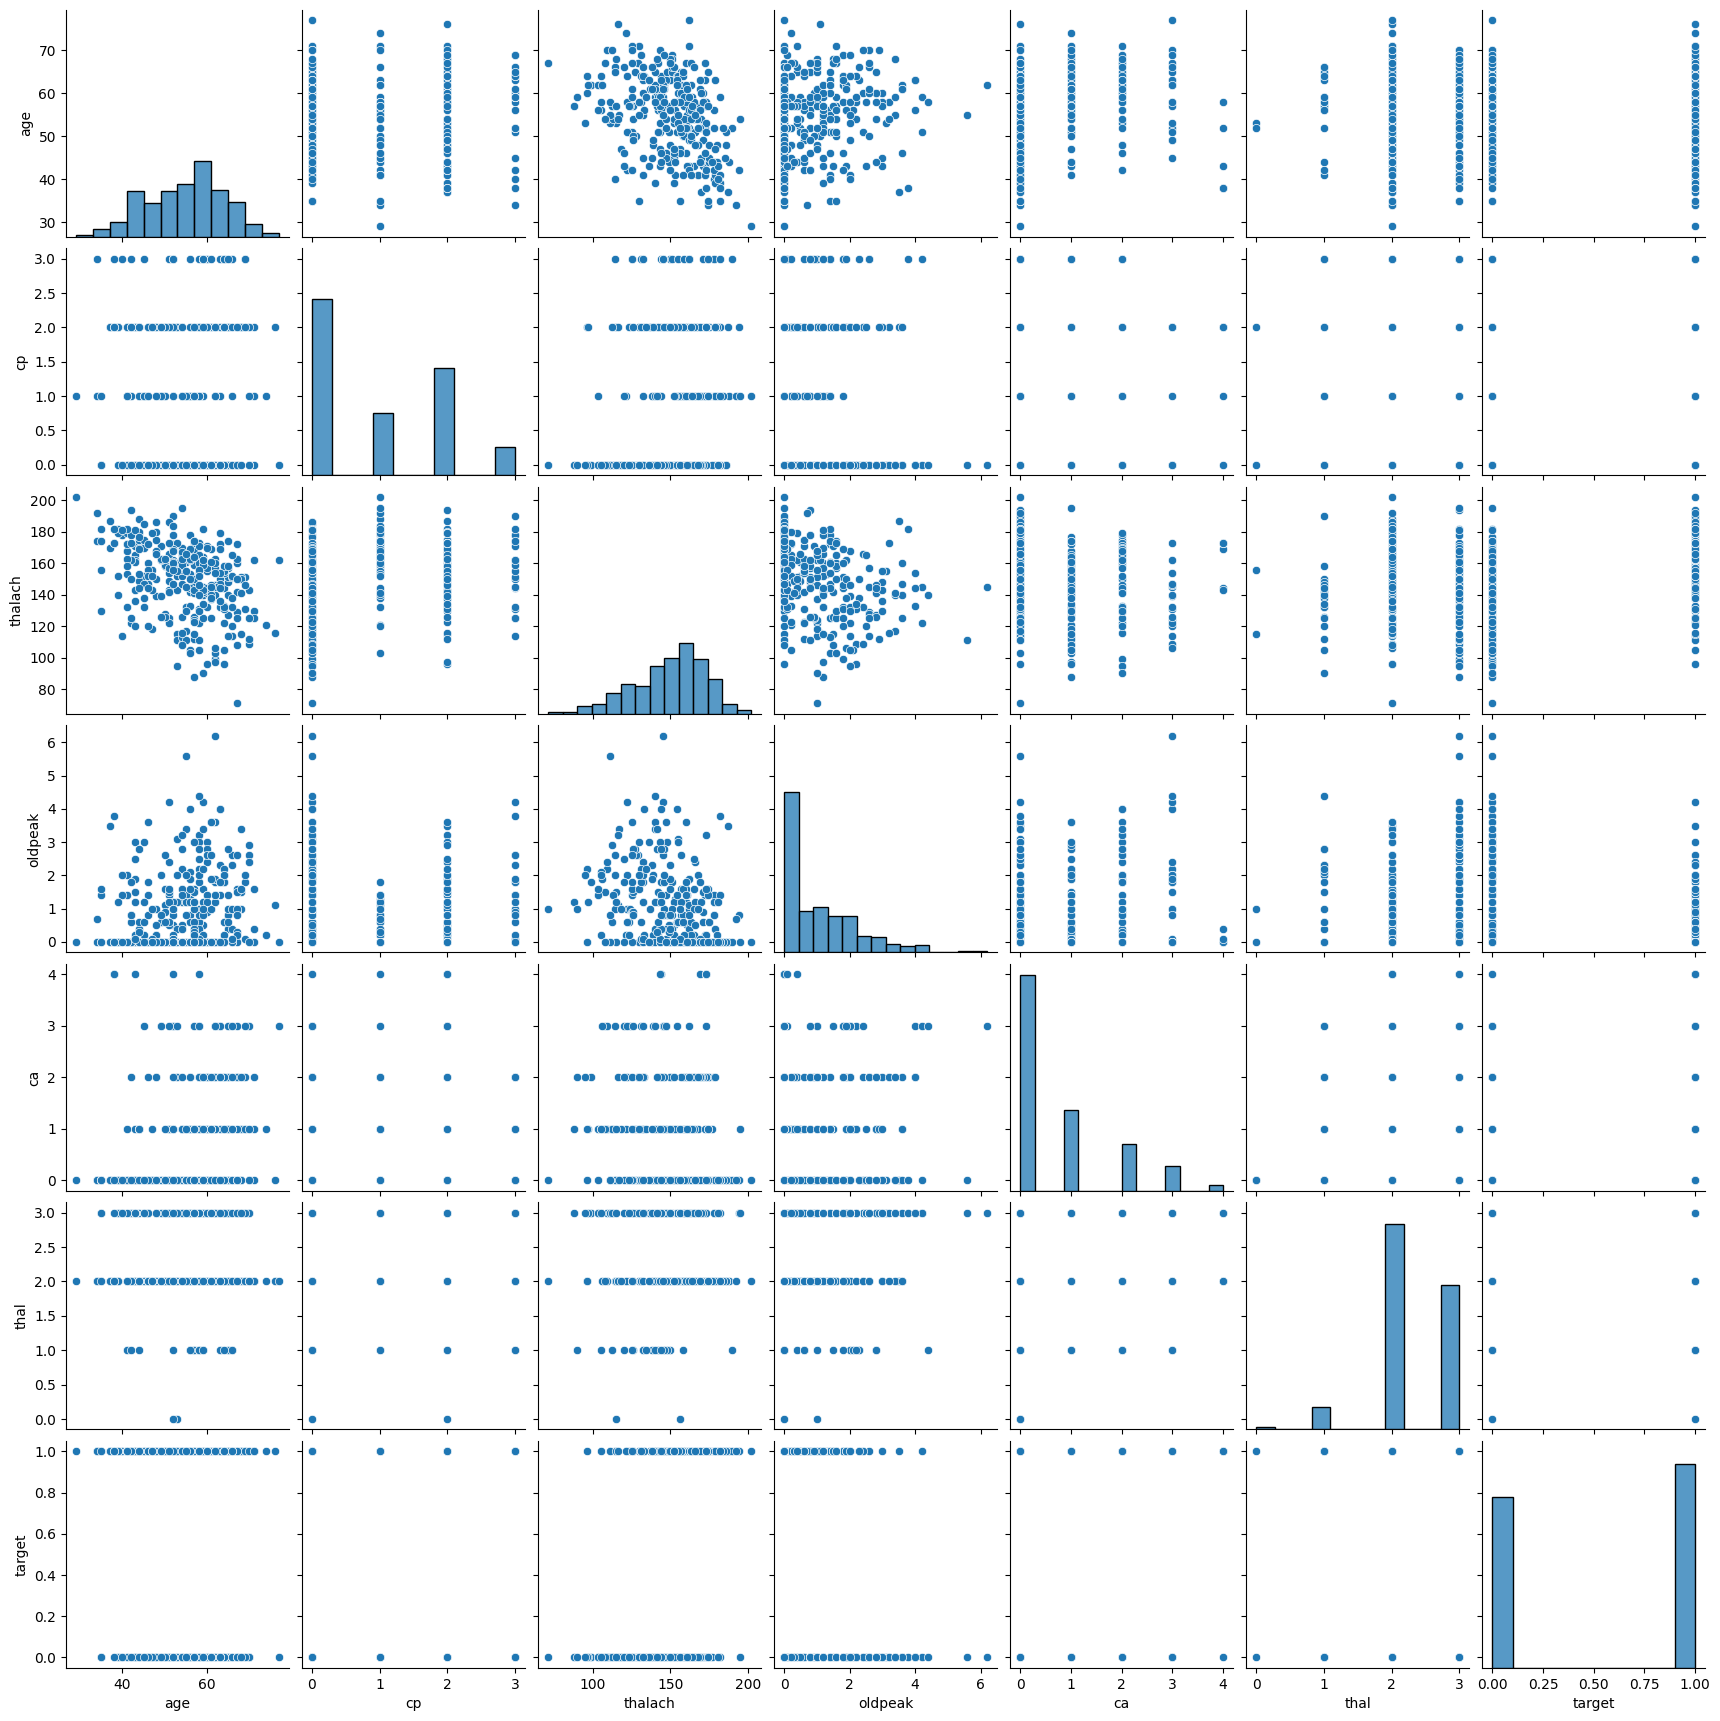

In [32]:
sns.pairplot(df)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

In [285]:
#Length of Membership

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

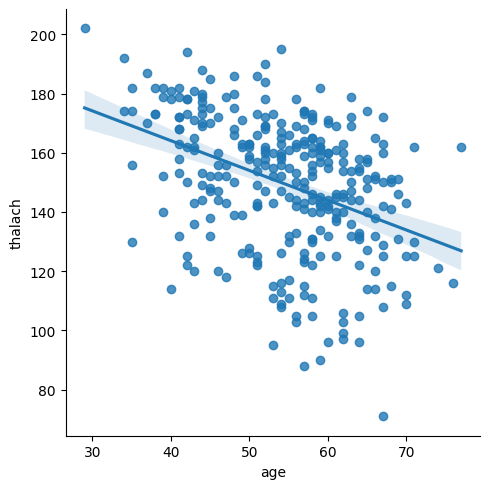

In [33]:
sns.lmplot(x='age',y ='thalach', data=df)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [34]:
y = df['target']

In [35]:
X = df[['age', 'cp', 'thalach', 'oldpeak', 'ca', 'thal']]

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [38]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [39]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [40]:
lm.fit(X_train,y_train)

LinearRegression()

**Print out the coefficients of the model**

In [41]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-0.0022801   0.14272239  0.00292607 -0.10706926 -0.08841467 -0.16491351]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [42]:
predictions = lm.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values. **

Text(0, 0.5, 'Predicted Y')

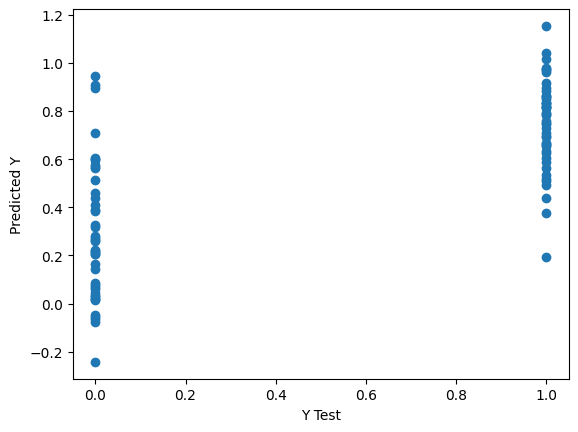

In [43]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

**Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. **

In [44]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.28400321738265727
MSE: 0.12800842248589314
RMSE: 0.35778264698821427


## Residuals

Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

C:\Users\sanja\AppData\Local\Temp\ipykernel_8968\1326397652.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


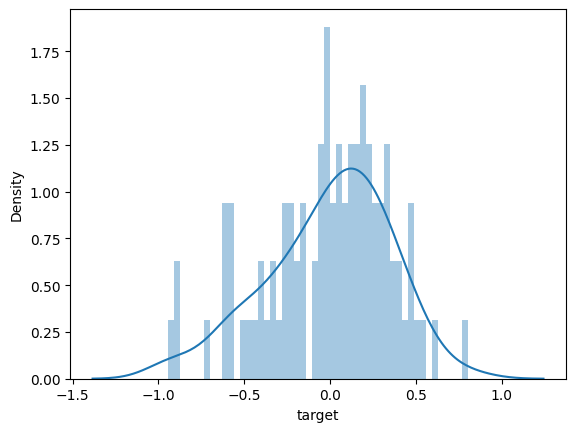

In [45]:
sns.distplot((y_test-predictions),bins=50);

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [46]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
age,-0.002280
cp,0.142722
thalach,0.002926
oldpeak,-0.107069
ca,-0.088415
thal,-0.164914


**Do you think the company should focus more on their mobile app or on their website?**


*Mobile App*

## Great Job!

We done it. Thank you